Google Play Store Analysis

Columns to analyze:

    Category

    Content Rating (not the rating column)

    Installs

 

Look over each content rating and number of installs.

Determine which content rating has the highest number of installs and how many categories it belongs to. 


Write a report of your findings and whether or not there is any sort of correlation. 

In [14]:
# import libraries

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [50]:
# read the csv file

data = pd.read_csv('googleplaystoremaster.csv')

In [51]:
# view first few rows of data

data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [52]:
# only conerned with 3 columns, remove ones not needed

data = data.drop(['App', 'Rating', 'Reviews', 'Size', 'Type', 'Price', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1)

In [53]:
# verfiy drop

data.head()

,Category,Installs,Content Rating
0,ART_AND_DESIGN,"10,000+",Everyone
1,ART_AND_DESIGN,"500,000+",Everyone
2,ART_AND_DESIGN,"5,000,000+",Everyone
3,ART_AND_DESIGN,"50,000,000+",Teen
4,ART_AND_DESIGN,"100,000+",Everyone


In [54]:
# check data types
data.dtypes

Category          object
Installs          object
Content Rating    object
dtype: object

In [60]:
# check Category values

data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [61]:
# drop the 1.9 category for clarity

data = data[data.Category != '1.9']

In [62]:
# check Category values

data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [63]:
# find out all the Content Rating names

data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [64]:
# remove the nan from Content Rating

data = data.dropna(subset=['Content Rating'])

In [65]:
# check if nan is gone

data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [66]:
# find all Install values

data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [67]:
# remove + and , from column

data['Installs'] = data['Installs'].str.replace('\+', '', regex=True)
data['Installs'] = data['Installs'].str.replace('\,', '', regex=True)

In [68]:
# verify removal

data['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [69]:
# convert to numeric

data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce')

In [70]:
# check cleaned 

data.head()

,Category,Installs,Content Rating
0,ART_AND_DESIGN,10000,Everyone
1,ART_AND_DESIGN,500000,Everyone
2,ART_AND_DESIGN,5000000,Everyone
3,ART_AND_DESIGN,50000000,Teen
4,ART_AND_DESIGN,100000,Everyone


(array([8.714e+03, 0.000e+00, 1.208e+03, 0.000e+00, 4.140e+02, 0.000e+00,
        4.990e+02, 0.000e+00, 3.000e+00, 2.000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

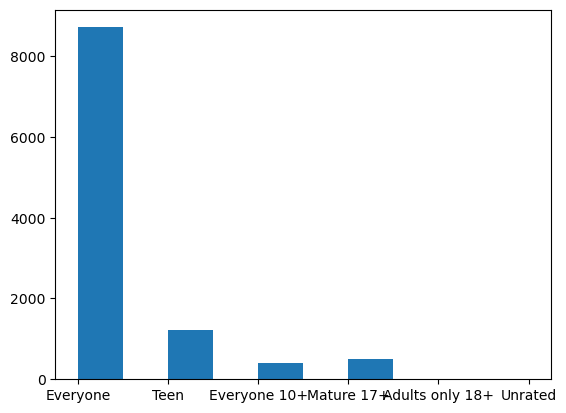

In [71]:
# bar chart to determine which content rating has most installs

plt.hist(data['Content Rating'])

<Axes: xlabel='Content Rating', ylabel='Installs'>

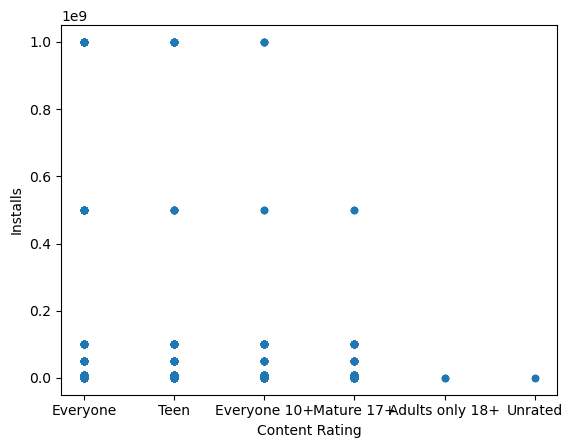

In [72]:
# correlation

data.plot(x ='Content Rating', y='Installs', kind='scatter')

In [75]:
# Everyone data 

everyoneData = data.loc[(data['Content Rating'] == 'Everyone')]
everyoneData.head()

,Category,Installs,Content Rating
0,ART_AND_DESIGN,10000,Everyone
1,ART_AND_DESIGN,500000,Everyone
2,ART_AND_DESIGN,5000000,Everyone
4,ART_AND_DESIGN,100000,Everyone
5,ART_AND_DESIGN,50000,Everyone


In [76]:
# total installs for Everyone data

everyoneData.Installs.count()

8714

In [77]:
# Number of values in Category

len(everyoneData.Category.unique())

33